# **STROKE PREDICTION**
![image](https://tse3.mm.bing.net/th?id=OIP.18VPTELS9OU5-SE04EUwBwHaC4)


**CONTEXT**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**So, Why Catboost Or, Lightgbm ?**

Boosting algorithms have become one of the most powerful algorithms for training on structural (tabular) data. The three most famous boosting algorithm implementations that have provided various recipes for winning ML competitions are:
1. XGBoost
2. CatBoost
3. LightGBM


We have a lot of categorical data. And Catboost And LightBGM are known to perform well in terms of tackling categorical data.CatBoost also provides significant performance potential as it performs remarkably well with default parameters, significantly improving performance when tuned.

Here, I'll be deploying both Of Them ! Let's See How They Perform.


# **Let's Start With CatBoost.**

In [1]:
#Important Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [ ]:
!pip3 install pandas_profiling --upgrade

import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

We can see that there are unique values in the data. We should drop them because they are not useful for our analysis.

In [6]:
data.drop(["id"], axis=1, inplace=True)

But is there any null data ?

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Let's deal with missing data. Here i'll use the mean value of the bmi column.

In [8]:
data["bmi"].fillna(data["bmi"].mean(), inplace=True)

In [9]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now that all the missing values are taken care of, we are good to go.

Let's dive deep into The Data First ! 
Let's Do A Quick Pandas Profiling.

In [10]:
profile = ProfileReport(data, title='Stroke Prediction Report', html={'style' : {'full_width':True}})
profile.to_file(output_file="Stroke Prediction.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

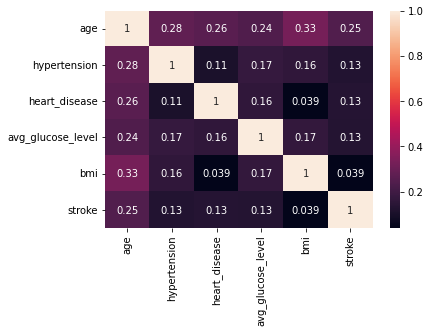

In [11]:
sns.heatmap(data.corr(), annot=True)
plt.show()

.
.
.

To handle the categorical data firstly,
We need to encode them. Here Catboost for classification can be used. We can use catFeatures.
We have to set a variabile for catFeatures. We should push categorical data's column indices to this variable.

In [12]:
cat_features = [0,4,5,6,9]
#It's time to set dependent and indepedent variable.
X = data.drop(["stroke"], axis=1)
y = data["stroke"]

In [13]:
#Splitting data to train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's import CatBoostClassifier.

In [ ]:
!pip3 install catboost

In [15]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()

I'm setting categorical features with cat_features variable. And Let's see how fast it is!

In [16]:
import time
start = time.time()

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

end = time.time()
diff = end - start

In [17]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))

CatBoost model is fitted: True


In [18]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",acc_score)
print("Execution Time: ",diff)


Accuracy Score:  0.9393346379647749
Execution Time:  13.878747701644897


# **Now Let's see how LightGBM Performs !**





Let's start with tackling the Categorical Data first. As We know LightGBM can't handle 'object' type.

In [19]:
for c in X.columns:
  col_type = X[c].dtype
  if col_type == 'object' or col_type.name == 'category' :
    X[c] = X[c].astype('category')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  4088 1022
length of y_train and y_test:  4088 1022


In [21]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
diff = end - start

In [22]:
y_pred=clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",acc_score)
print("Execution Time: ",diff)

Accuracy Score:  0.9471624266144814
Execution Time:  1.1857192516326904


Clearly LightGBM was Way Faster Than CatBoost !
And In Terms Of Accuracy Both The Models Were More Or Less  Same.
But LightGBM turns out to be Overall Winner Here.

Alright That's It ! 

![image](https://tse1.mm.bing.net/th?id=OIP.g-vYsHMc578bKd-ANOgm_gAAAA)